<a href="https://colab.research.google.com/github/mowgl-i/Student-Projects/blob/master/Machine_Learning_from_Disaster_Titanic/Final_R_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install these required things (we only need to run these once, if you already ran, you're good)

In [0]:
install.packages("rgl", repos = "http://cran.rstudio.com/")
install.packages("ConsRank", repos = "http://cran.rstudio.com/")
library("ConsRank")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘miniUI’, ‘webshot’, ‘manipulateWidget’

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘proxy’, ‘gtools’

Loading required package: proxy

Attaching package: ‘proxy’

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix

Loading required package: rgl
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”Loading required package: gtools

Attaching package: ‘ConsRank’

The following object is masked from ‘package:base’:

    labels



In [0]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

In [0]:
install.packages('ggmap')
install.packages('codetools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘jpeg’, ‘bitops’

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
library("ggmap")

Loading required package: ggplot2
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [0]:
options(repr.plot.width  = 3,
        repr.plot.height = 3)
Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Loading required package: StanHeaders
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


## Default code

### We don't need this for the project. Though, it could be useful to learn from.

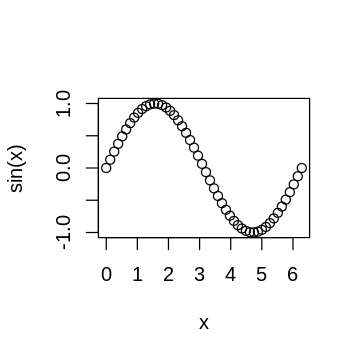

In [0]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))

In [0]:
stanmodelcode <- "
data {
    int<lower=0> N; 
    real y[N];
}

parameters {
    real mu; 

}

model {
    target += normal_lpdf(mu | 0, 10);
    target += normal_lpdf(y | mu, 1);
}"

y <- rnorm(20)
dat <- list(N = 20, y = y);

fit <- stan(model_code = stanmodelcode, model_name = "example",
            data = dat, iter = 2012, chains = 8, sample_file = 'norm.csv',
            verbose = FALSE,
            refresh = -1)

print(fit)

Inference for Stan model: example.
8 chains, each with iter=2012; warmup=1006; thin=1; 
post-warmup draws per chain=1006, total post-warmup draws=8048.

       mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu     0.20    0.00 0.22  -0.24   0.05   0.20   0.35   0.64  2955    1
lp__ -27.79    0.01 0.69 -29.74 -27.95 -27.52 -27.35 -27.30  3590    1

Samples were drawn using NUTS(diag_e) at Tue Dec  3 16:48:15 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


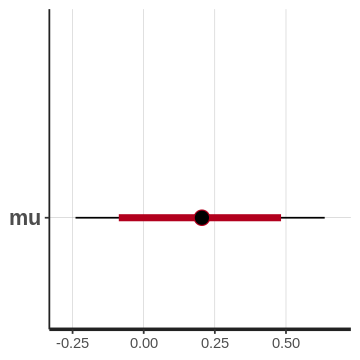

In [0]:
plot(fit)

In [0]:
y <- as.matrix(read.table('https://raw.github.com/wiki/stan-dev/rstan/rats.txt', header = TRUE))
x <- c(8, 15, 22, 29, 36)
xbar <- mean(x)
N <- nrow(y)
T <- ncol(y)
rats_fit <- stan(file = 'https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan')


Warning message in normalizePath(file):
“path[1]="https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan": No such file or directory”

DIAGNOSTIC(S) FROM PARSER:
Info: Comments beginning with # are deprecated.  Please use // in place of # for line comments.
Info: Comments beginning with # are deprecated.  Please use // in place of # for line comments.
Info: Comments beginning with # are deprecated.  Please use // in place of # for line comments.
Info: Comments beginning with # are deprecated.  Please use // in place of # for line comments.
Info: assignment operator <- deprecated in the Stan language; use = instead.
Info: assignment operator <- deprecated in the Stan language; use = instead.
Info: assignment operator <- deprecated in the Stan language; use = instead.
Info: assignment operator <- deprecated in the Stan language; use = instead.



In [0]:
rats_fit

Inference for Stan model: rats.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                 mean se_mean    sd    2.5%     25%     50%     75%   97.5%
alpha[1]       239.88    0.03  2.63  234.68  238.14  239.86  241.64  245.04
alpha[2]       247.78    0.04  2.67  242.42  246.01  247.81  249.61  253.02
alpha[3]       252.37    0.04  2.62  247.17  250.61  252.35  254.15  257.41
alpha[4]       232.57    0.04  2.73  227.27  230.68  232.57  234.44  237.99
alpha[5]       231.63    0.04  2.64  226.34  229.88  231.60  233.39  236.78
alpha[6]       249.75    0.04  2.70  244.47  247.90  249.79  251.61  255.05
alpha[7]       228.71    0.04  2.63  223.61  226.94  228.75  230.45  233.88
alpha[8]       248.38    0.04  2.63  243.16  246.65  248.37  250.13  253.58
alpha[9]       283.29    0.04  2.69  278.04  281.51  283.31  285.08  288.57
alpha[10]      219.29    0.04  2.68  214.09  217.51  219.25  221.06  224.76
alpha[11]     

'pars' not specified. Showing first 10 parameters by default.
ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


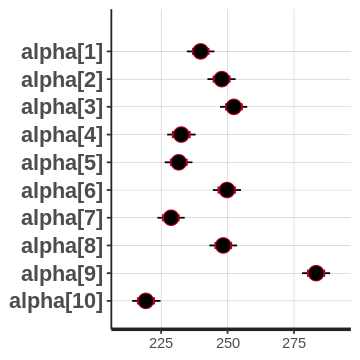

In [0]:
plot(rats_fit)

In [0]:
## load APA data set, full version
data(APAFULL)
## Emond and Mason Branch-and-Bound algorithm.
## If the number of object is higher than 20, EMCons function may work for several minutes.
## Use either QuickCons, DECOR, FASTcons or FASTDECOR instead
CR=EMCons(APAFULL)

[1] "round 1"
[1] "evaluating 1 branches"
[1] "evaluating 1 branches"
[1] "evaluating 1 branches"
[1] "evaluating 1 branches"


In [0]:
TR=tabulaterows(APAFULL)
CR2=FASTcons(TR$X,TR$Wk,maxiter=5)
CR3=QuickCons(TR$X,TR$Wk)
CR4=DECOR(TR$X,TR$Wk)
#####################################
### load sports data set
#data(sports)
### FAST algorithm
#CR=FASTcons(sports,maxiter=10)
#####################################
#######################################
### load Emond and Mason data set
#data(EMD)
### matrix X contains rankings
#X=EMD[,1:15]
### vector Wk contains frequencies
#Wk=EMD[,16]
### QUICK algorithm
#CR=QuickCons(X,Wk)
#######################################

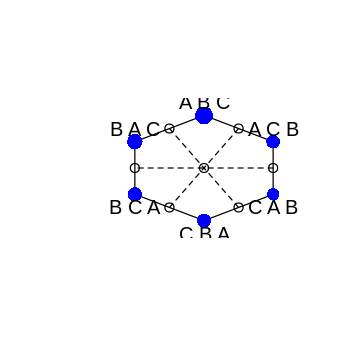

In [0]:
data(BU)
polyplot(BU[,1:3],Wk=BU[,4])

# Final Project Code - start here!! run it all!

In [0]:
install.packages("broom")
install.packages("pROC")
install.packages("randomForest")
install.packages("rpart.plot")
install.packages("rpart")
install.packages("DescTools")
install.packages("ggplot2")
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
library(dplyr)
library(broom)
library(pROC)
library(randomForest)
library(rpart.plot)
library(rpart)
library(DescTools)
library(ggplot2)
library(caTools)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: rpart

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



## Loading in the data

In [0]:
data <- read.csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
test.1 <- read.csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")

In [0]:
sample <- sample.split(data, SplitRatio = 0.7)

train <- subset(data, sample == T)
test <- subset(data, sample == F)

glimpse(train)
glimpse(test)

Observations: 594
Variables: 12
$ PassengerId <int> 2, 3, 4, 5, 8, 9, 10, 11, 14, 15, 16, 17, 20, 21, 22, 23,…
$ Survived    <int> 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, …
$ Pclass      <int> 1, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 1, …
$ Name        <fct> "Cumings, Mrs. John Bradley (Florence Briggs Thayer)", "H…
$ Sex         <fct> female, female, female, male, male, female, female, femal…
$ Age         <dbl> 38, 26, 35, 35, 2, 27, 14, 4, 39, 14, 55, 2, NA, 35, 34, …
$ SibSp       <int> 1, 0, 1, 0, 3, 0, 1, 1, 1, 0, 0, 4, 0, 0, 0, 0, 1, 0, 3, …
$ Parch       <int> 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 1, 0, 0, 0, 0, 5, 0, 2, …
$ Ticket      <fct> PC 17599, STON/O2. 3101282, 113803, 373450, 349909, 34774…
$ Fare        <dbl> 71.2833, 7.9250, 53.1000, 8.0500, 21.0750, 11.1333, 30.07…
$ Cabin       <fct> C85, , C123, , , , , G6, , , , , , , D56, , , , C23 C25 C…
$ Embarked    <fct> C, S, S, S, S, S, C, S, S, S, S, Q, C, S, S, Q, S, C, S, …
Observations: 297
Va

In [0]:
train$Survived <- as.factor(train$Survived)

### Test visualization

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

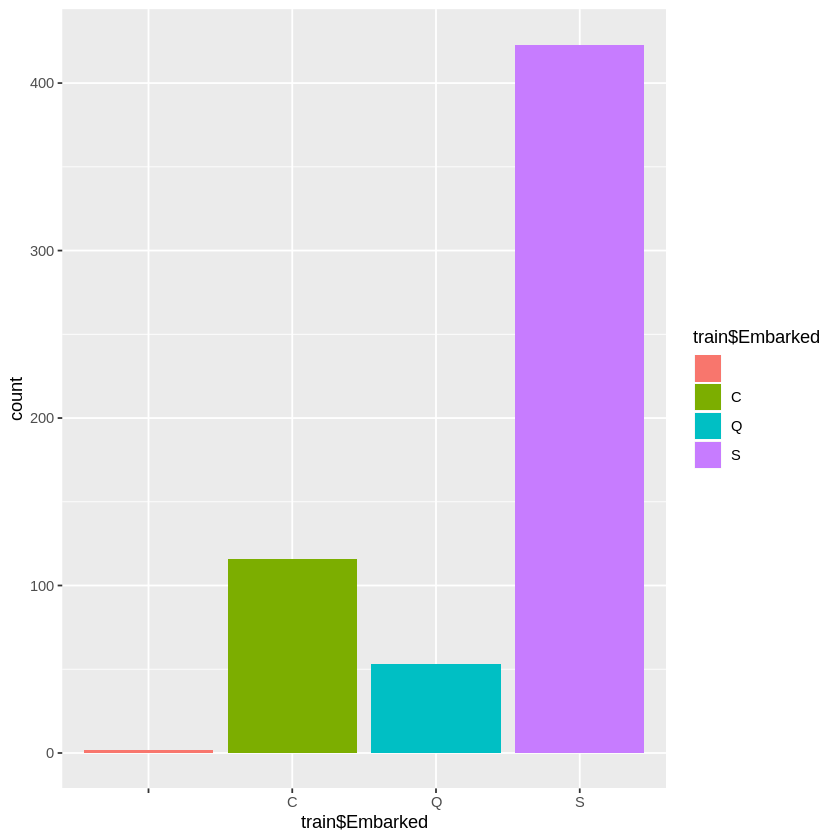

In [0]:
ggplot(train, aes(x = train$Embarked, fill = train$Embarked))+
geom_histogram( stat = "count")


## Step 1: Exploratory Data Analisys. 
### Mowgli's section

### Variable selection. Delete these!

### - Cabin <br> - Ticket <br> - Name <br> - Embark

In [0]:
test <- test %>% 
select(-c(Cabin, Ticket, Name, Embarked))
train <- train %>%
select(-c(Cabin, Ticket, Name, Embarked))

In [0]:
head(train, n = 20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>
2,2,1,1,female,38,1,0,71.2833
3,3,1,3,female,26,0,0,7.9250
4,4,1,1,female,35,1,0,53.1000
5,5,0,3,male,35,0,0,8.0500
8,8,0,3,male,2,3,1,21.0750
9,9,1,3,female,27,0,2,11.1333
10,10,1,2,female,14,1,0,30.0708
11,11,1,3,female,4,1,1,16.7000
14,14,0,3,male,39,1,5,31.2750


In [0]:
train %>%
summarise_all(funs(sum(is.na(.))))

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,115,0,0,0


We'd like to keep age, and we'd believe it to be an important factor. 177 is not alot of missing data considering that we have roughly 600 other observations to train with. Though, we should still compare models with and without age to determine its' predictive utility. Thankfully, the data appears to be independent. Just because we know the age, siblings on board or anything else, it wouldn't tell us about the other observations. Therefore, we can get rid of them, assuming that they're missing at random.  

In [0]:
train <- na.omit(train)
test <- na.omit(test)

### Prelim Visualizations

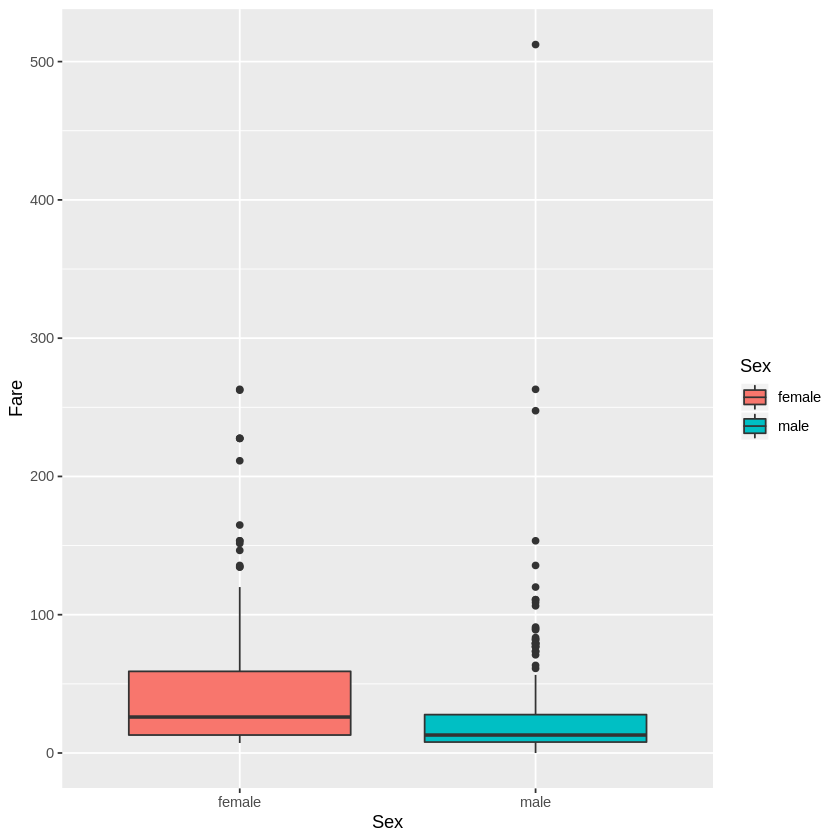

In [0]:
ggplot(train, aes(y = Fare, x = Sex, fill = Sex))+
geom_boxplot()


I see alot of red triangles, did more women survive then men? Considering that there were more men onboard overall, we should compare preportions.
 

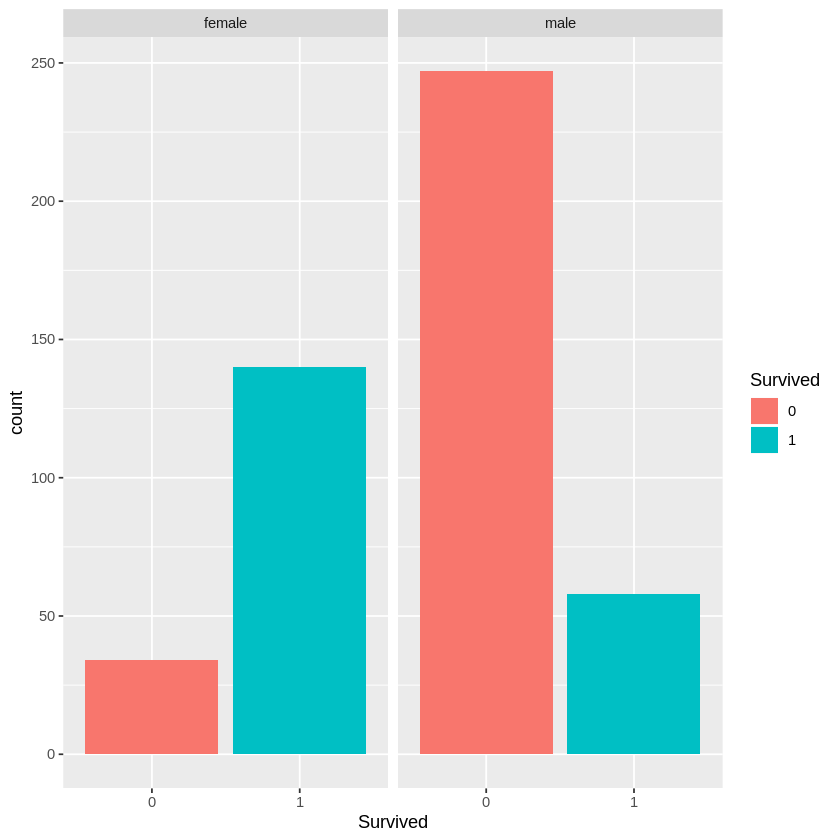

In [0]:
ggplot(train, aes(x = Survived, fill = Survived))+
geom_bar()+
facet_wrap(vars(Sex))

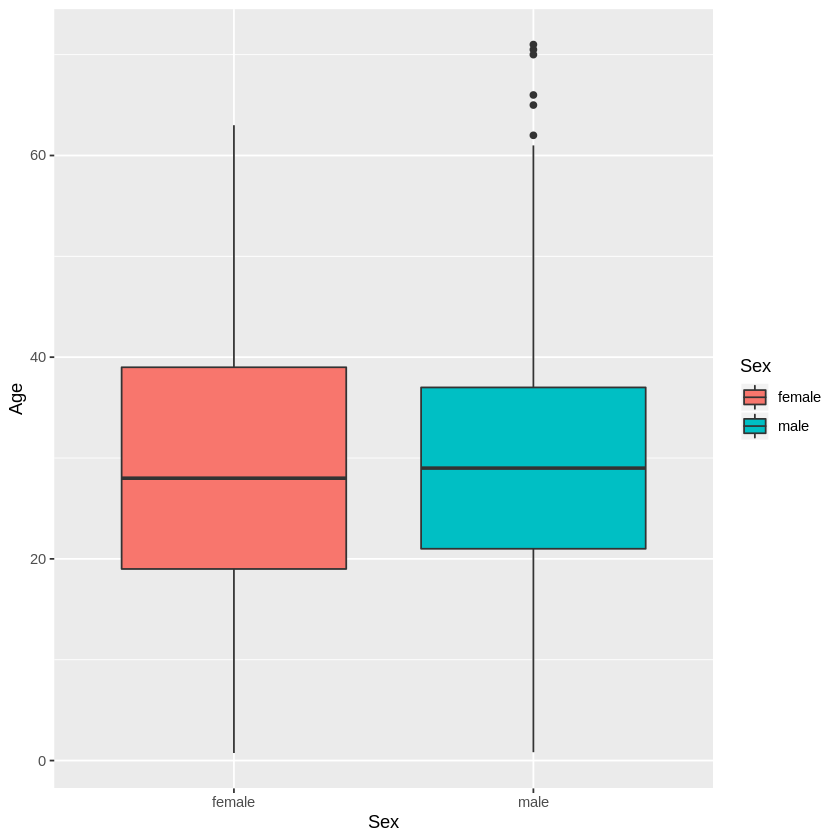

In [0]:
ggplot(train, aes(x = Sex, y = Age, fill = Sex))+
geom_boxplot()

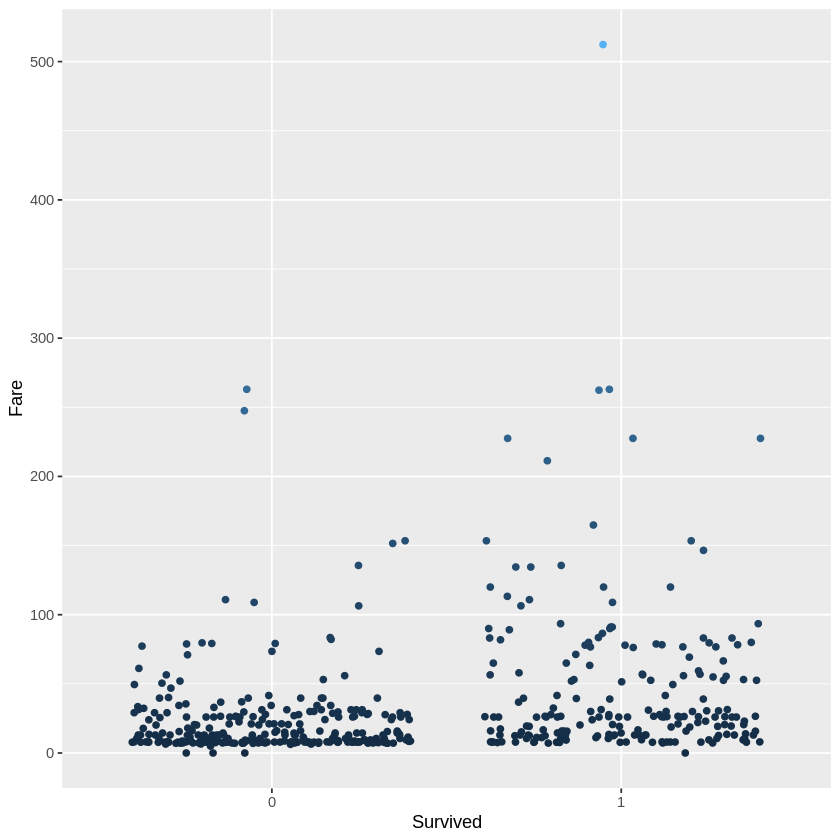

In [0]:
ggplot(train, aes(y = Fare, x = Survived , color = Fare))+
geom_point(position = "jitter", show.legend = F)

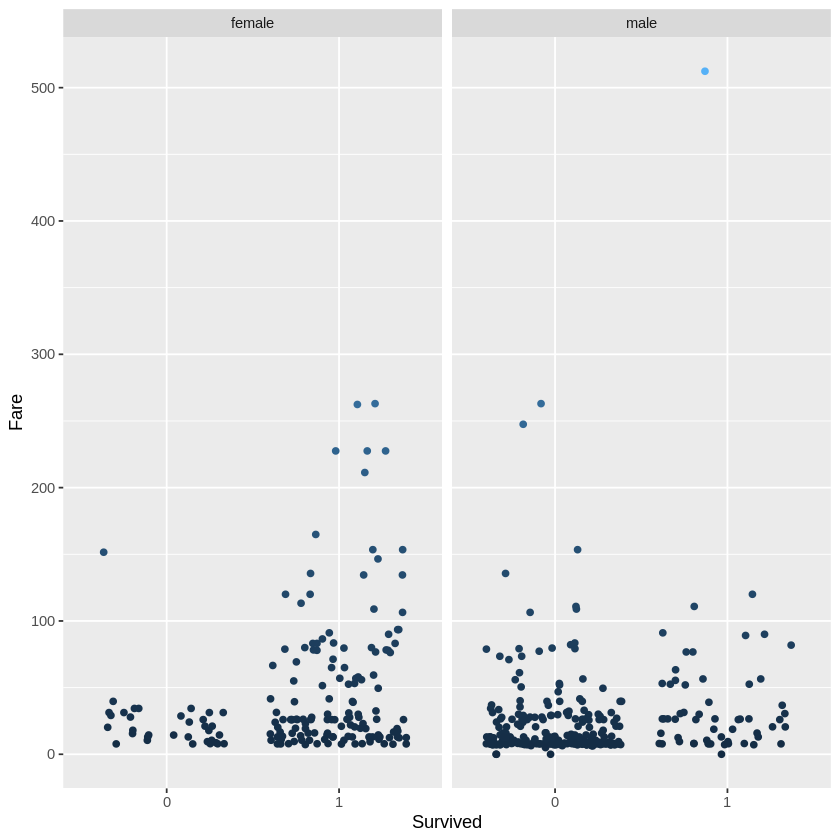

In [0]:
ggplot(train, aes(y = Fare, x = Survived , color = Fare))+
geom_point(position = "jitter", show.legend = F)+
facet_wrap(vars(Sex))

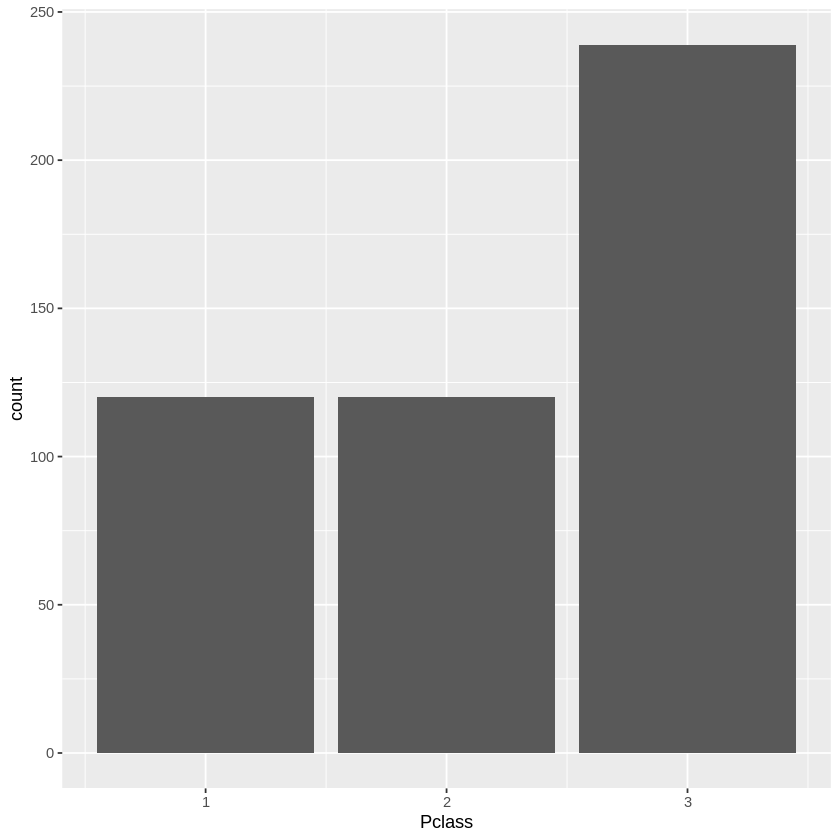

In [0]:
ggplot(train, aes(x = Pclass))+
geom_bar(stat = "count")

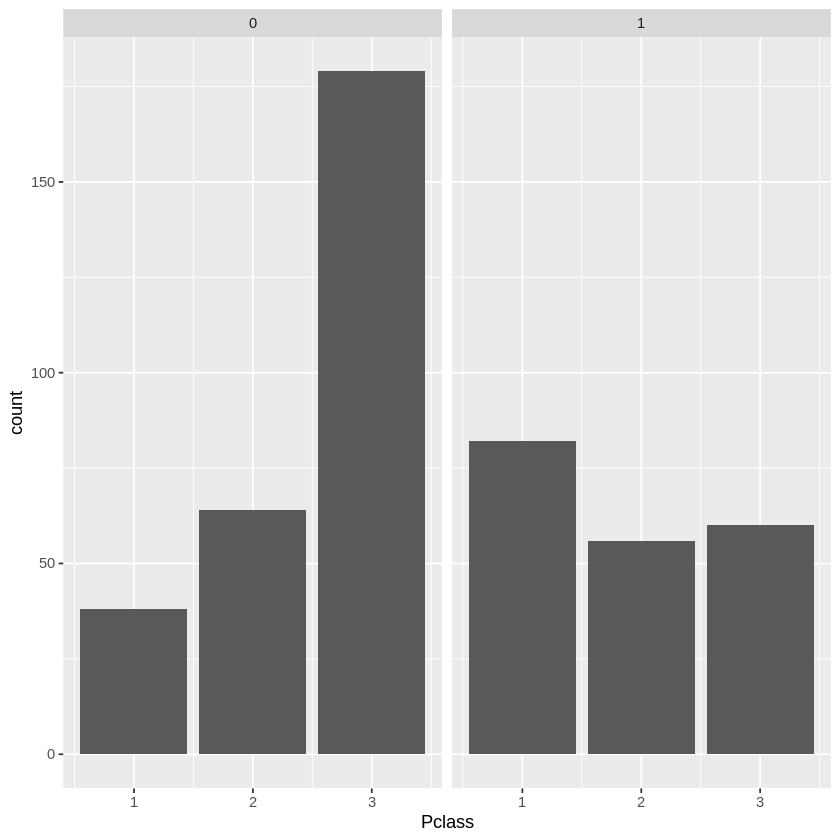

In [0]:
ggplot(train, aes(x = Pclass))+
geom_bar(stat = "count")+
facet_wrap(vars(Survived))

## Step 2: Logistic Regression (glm)

### Reshma's section

#### GLM 1

In [0]:
# Creating the first logistic regression model 
glm1 <- glm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare, data = train, family = "binomial")



In [0]:
# Calculating the McFadden Value/R^2 to compare the logsitc models to eachother
PseudoR2(glm1)

McFadden 
0.3907748

In [0]:
GLM1 <- glm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare, data = train, family = "binomial") %>%
  augment(type.predict = "response") %>%
  mutate(predicted = ifelse(.fitted > .05, 1, 0))

In [0]:
# Trying to create a confusion matrix 
table(GLM1$Survived, GLM1$predicted)

   
      0   1
  0  32 249
  1   1 197

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8807

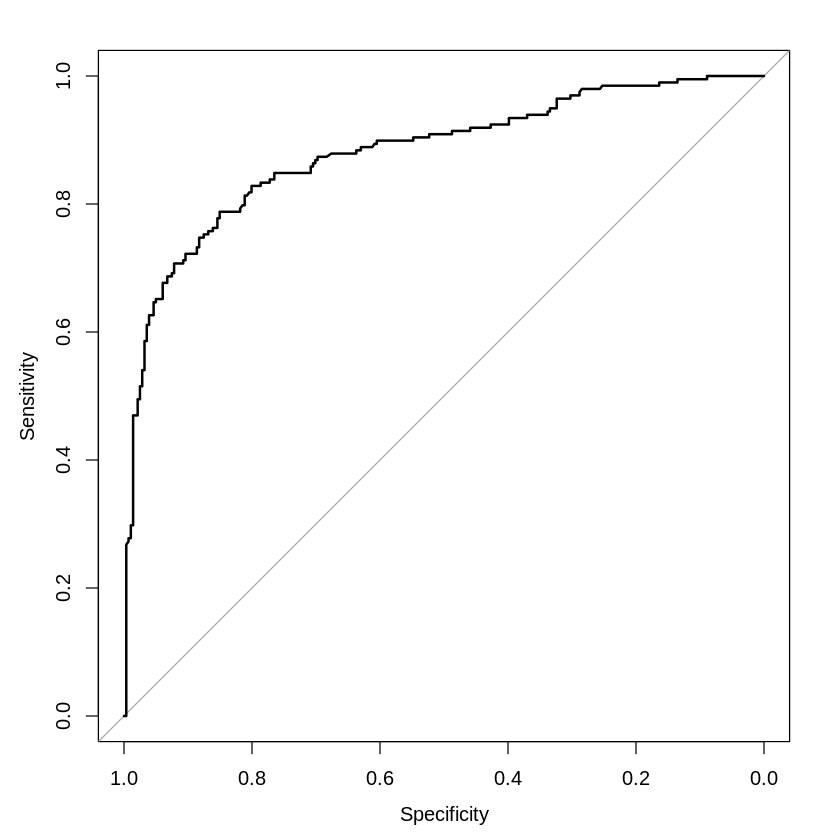

In [0]:
# Trying to plot the ROC curve and calculate AUC 
RocGLM1 <- roc(GLM1$Survived, GLM1$.fitted)
plot(RocGLM1)
auc(RocGLM1)

#### GLM 2

In [0]:
glm2 <- glm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Pclass*Sex*Age*SibSp*Parch*Fare, data = train, family = "binomial") 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [0]:
PseudoR2(glm2)

McFadden 
0.5731629

In [0]:
prediction2 <- glm2 %>%
  augment(type.predict = "response", newdata = test) %>%
  mutate(predicted = ifelse(.fitted > .05, 1, 0))

Setting levels: control = 0, case = 1
Setting direction: controls < cases


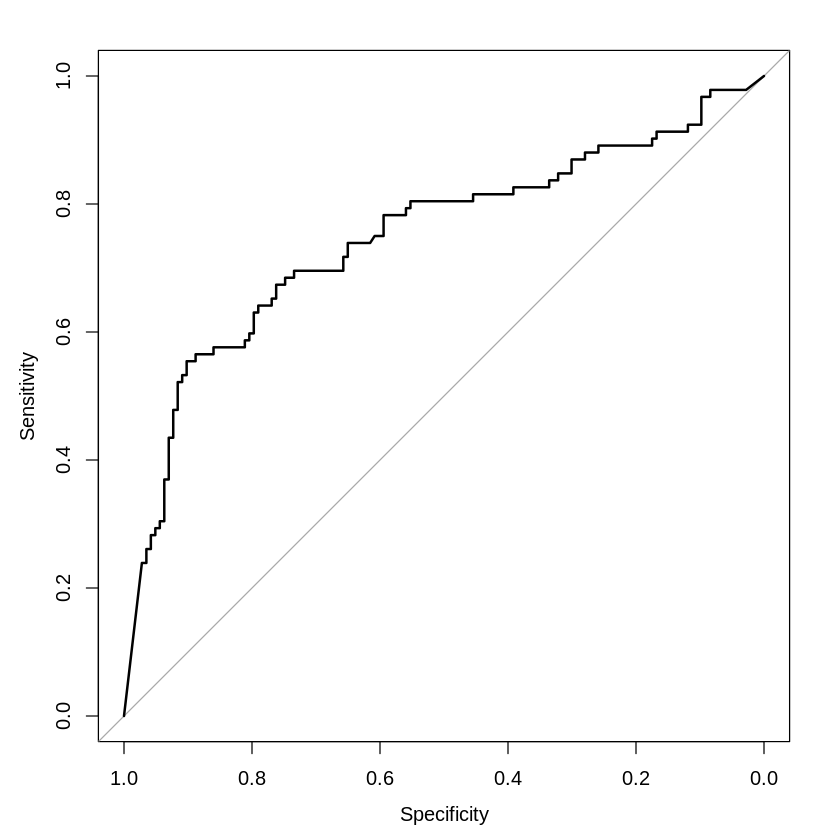

In [0]:
roc_glm2 <- roc(prediction2$Survived, prediction2$.fitted)
plot(roc_glm2)


In [0]:
auc(roc_glm2)

Area under the curve: 0.7474

#### GLM 3

In [0]:
glm3 <- glm(Survived ~ Pclass + Sex + Age, data = train, family = "binomial") 
summary(glm3)


Call:
glm(formula = Survived ~ Pclass + Sex + Age, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8542  -0.6361  -0.3646   0.5712   2.5147  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.39914    0.64873   8.323  < 2e-16 ***
Pclass      -1.26301    0.17521  -7.208 5.66e-13 ***
Sexmale     -2.92501    0.26763 -10.929  < 2e-16 ***
Age         -0.04008    0.01005  -3.986 6.71e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 649.58  on 478  degrees of freedom
Residual deviance: 405.82  on 475  degrees of freedom
AIC: 413.82

Number of Fisher Scoring iterations: 5


In [0]:
glm(Survived ~ Pclass + Sex + Age, data = train, family = "binomial") %>%
  PseudoR2()

McFadden 
0.3752578

In [0]:
prediction3 <- glm3 %>%
  augment(type.predict = "response", newdata = test) %>%
  mutate(predicted = ifelse(.fitted > .05, 1, 0))


Setting levels: control = 0, case = 1
Setting direction: controls < cases


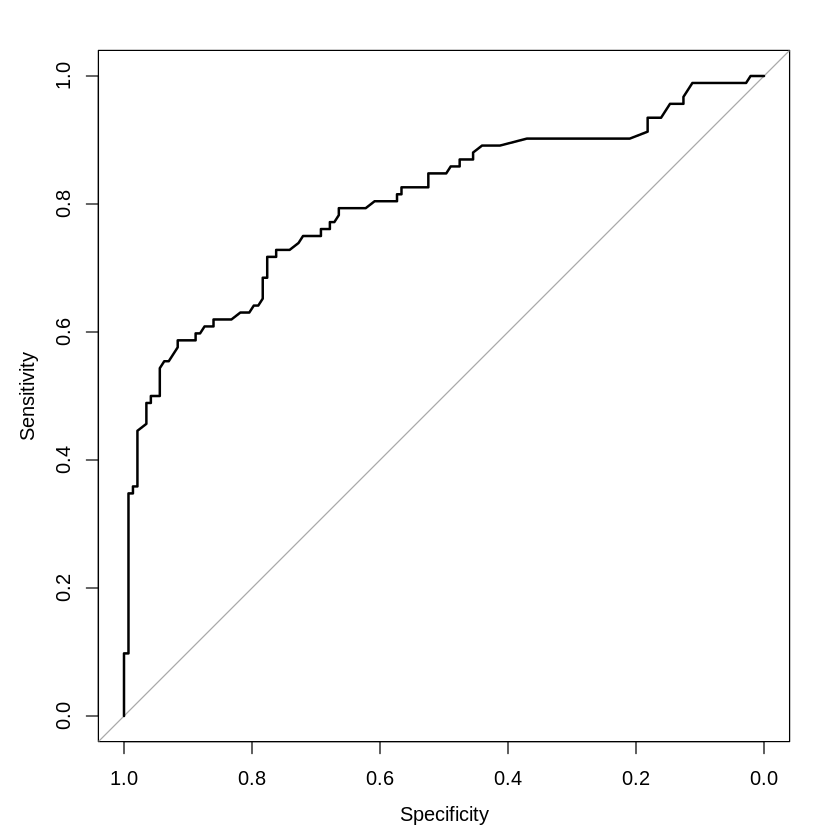

In [0]:
roc_glm3 <- roc(prediction3$Survived, prediction3$.fitted)
plot(roc_glm3)

In [0]:
auc(roc_glm3)

Area under the curve: 0.8035

#### GLM 4 * * * 

In [0]:
#glimpse(test_glm)

In [0]:
Best_glm <-glm(Survived ~ Pclass*Sex*Age*SibSp*Parch, data = train, family = "binomial")

Best_glm %>%
summary()

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Survived ~ Pclass * Sex * Age * SibSp * Parch, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3024  -0.5699  -0.3284   0.2826   2.6589  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)                     9.540e+00  4.607e+00   2.070   0.0384 *
Pclass                         -2.979e+00  1.622e+00  -1.836   0.0663 .
Sexmale                        -7.817e+00  5.004e+00  -1.562   0.1182  
Age                            -1.352e-01  1.021e-01  -1.325   0.1851  
SibSp                           6.094e+00  1.277e+01   0.477   0.6331  
Parch                           5.077e+01  9.090e+04   0.001   0.9996  
Pclass:Sexmale                  2.085e+00  1.804e+00   1.156   0.2478  
Pclass:Age                      4.671e-02  3.884e-02   1.203   0.2291  
Sexmale:Age                     8.259e-02  1.152e-01   0.717   0.4733  
Pclass:SibSp                   -1.917e+00  

In [0]:
test_glm <-Best_glm %>%
augment(type.predict = "response", newdata = test) %>%
mutate(predicted = ifelse(.fitted >= 0.5, 1,0))
auc(test$Survived, test_glm$predicted)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7624

Setting levels: control = 0, case = 1
Setting direction: controls < cases


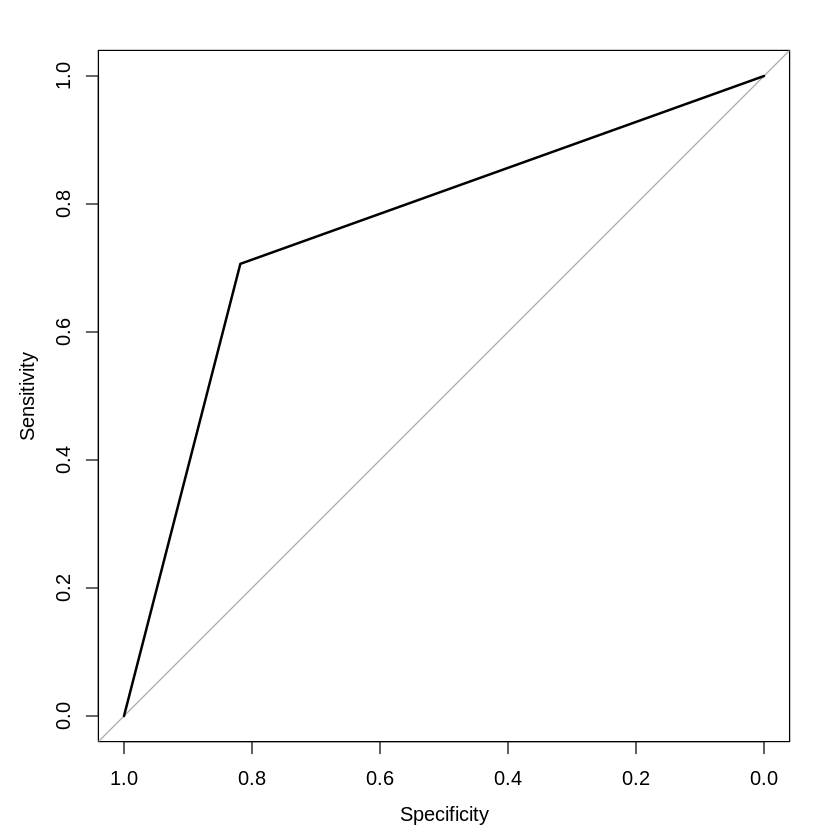

In [0]:
roc_test <- roc(test$Survived, test_glm$predicted)
plot(roc_test)

#### GLM 5

In [0]:
glm5 <- glm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare, data = train, family = "binomial")
summary(glm5)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9230  -0.5870  -0.3429   0.5562   2.4864  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.912089   0.792822   7.457 8.85e-14 ***
Pclass      -1.196111   0.208633  -5.733 9.86e-09 ***
Sexmale     -3.097065   0.291755 -10.615  < 2e-16 ***
Age         -0.050889   0.011121  -4.576 4.74e-06 ***
SibSp       -0.439351   0.165507  -2.655  0.00794 ** 
Parch       -0.134465   0.159957  -0.841  0.40055    
Fare         0.002322   0.003402   0.682  0.49494    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 649.58  on 478  degrees of freedom
Residual deviance: 395.74  on 472  degrees of freedom
AIC: 409.74

Number of Fisher Scoring iterations: 5


In [0]:
glm(Survived ~ Fare, data = train, family = "binomial") %>% 
  PseudoR2()

McFadden 
0.06708827

In [0]:
prediction5 <- glm5 %>%
  augment(type.predict = "response", newdata = test) %>%
  mutate(predicted = ifelse(.fitted > .05, 1, 0))

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8053

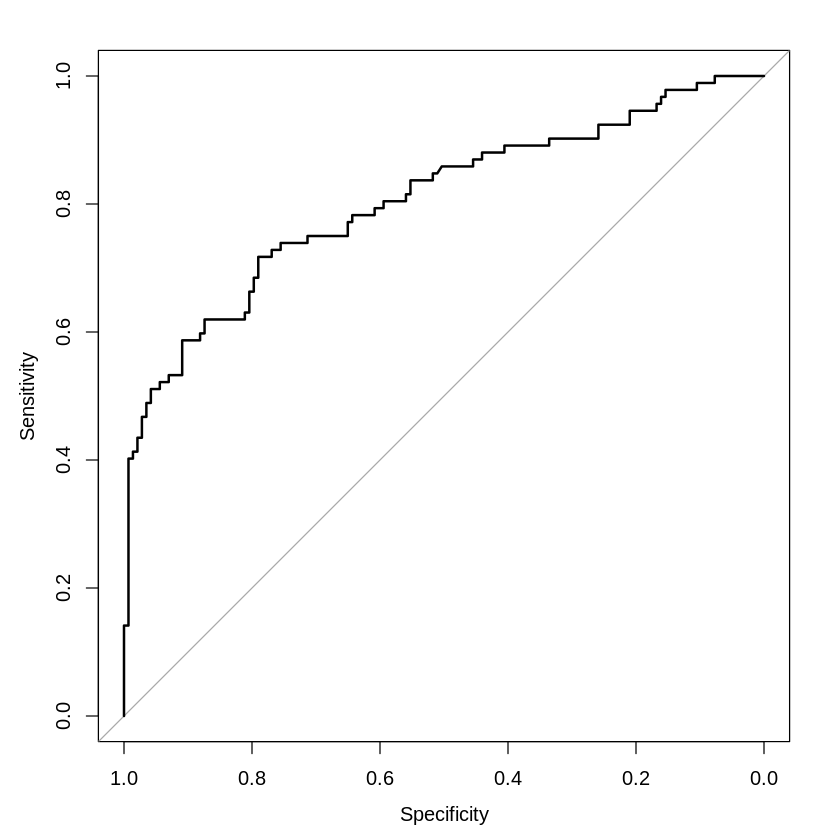

In [0]:
roc_glm5 <- roc(prediction5$Survived, prediction5$.fitted)
plot(roc_glm5)
auc(roc_glm5)

## Step 3: Decision Tree

### Roshane's section



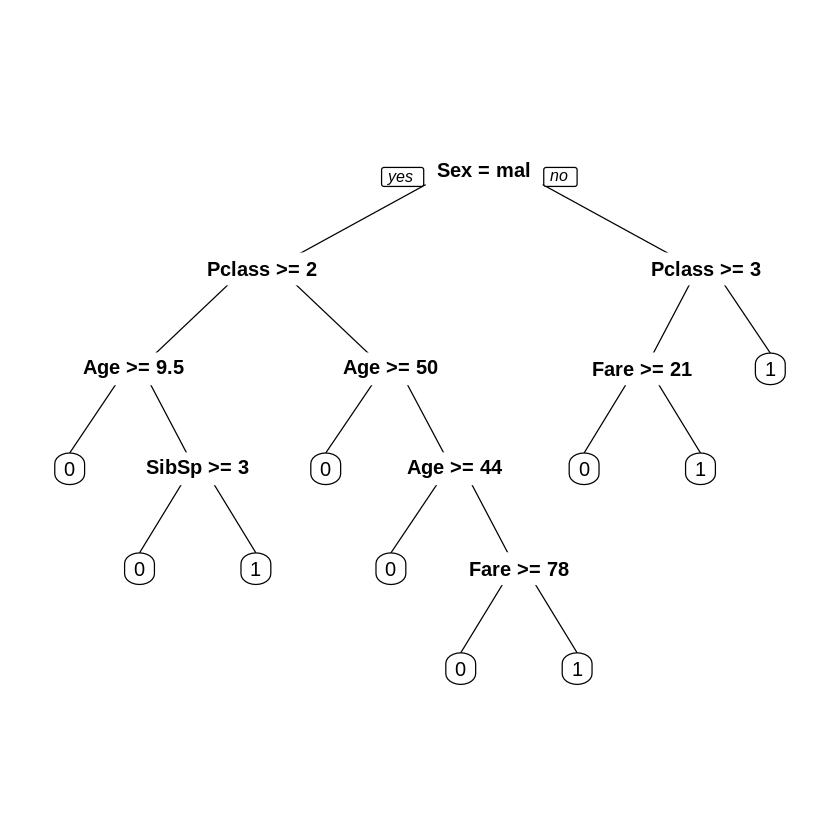

In [0]:
titanic_tree <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare, data = train, method = "class")
prp(titanic_tree)


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8134

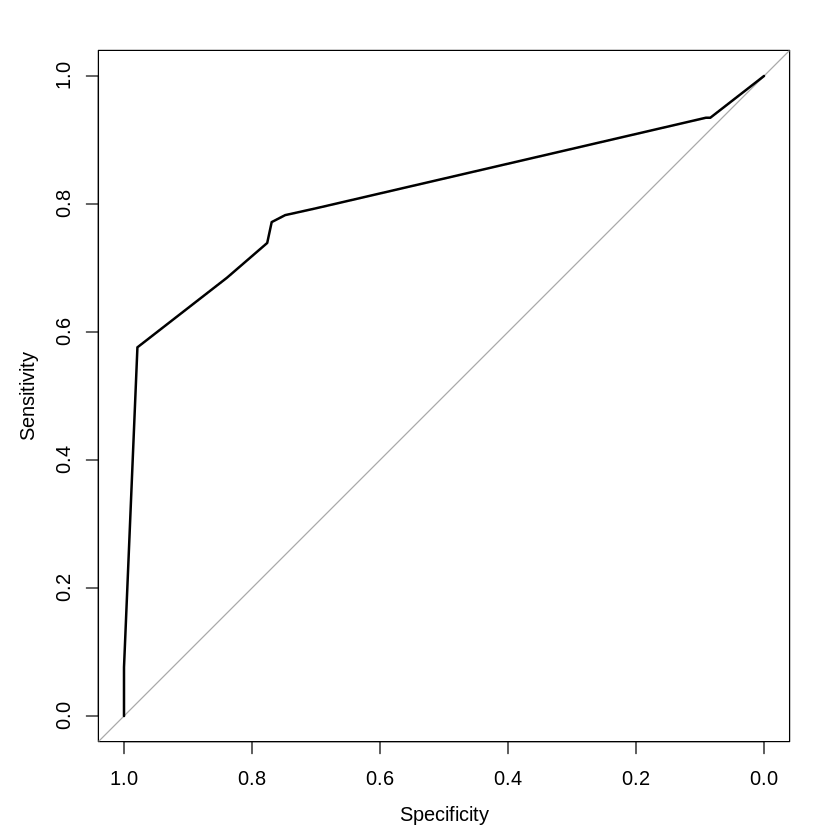

In [0]:
predict_tree <- predict(titanic_tree, newdata = test)
roc_tree <- roc(test$Survived, predict_tree[,2])

plot(roc_tree)
auc(roc_tree)


## Step 4: Random Forest

### Jaz and April's section

In [0]:
install.packages("ROSE")
library(ROSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Loaded ROSE 0.0-3



,MeanDecreaseAccuracy
Sex,42.839472
Age,4.625547
SibSp,4.577382
Parch,7.219468
Fare,8.161435


Setting levels: control = 0, case = 1
Setting direction: controls < cases


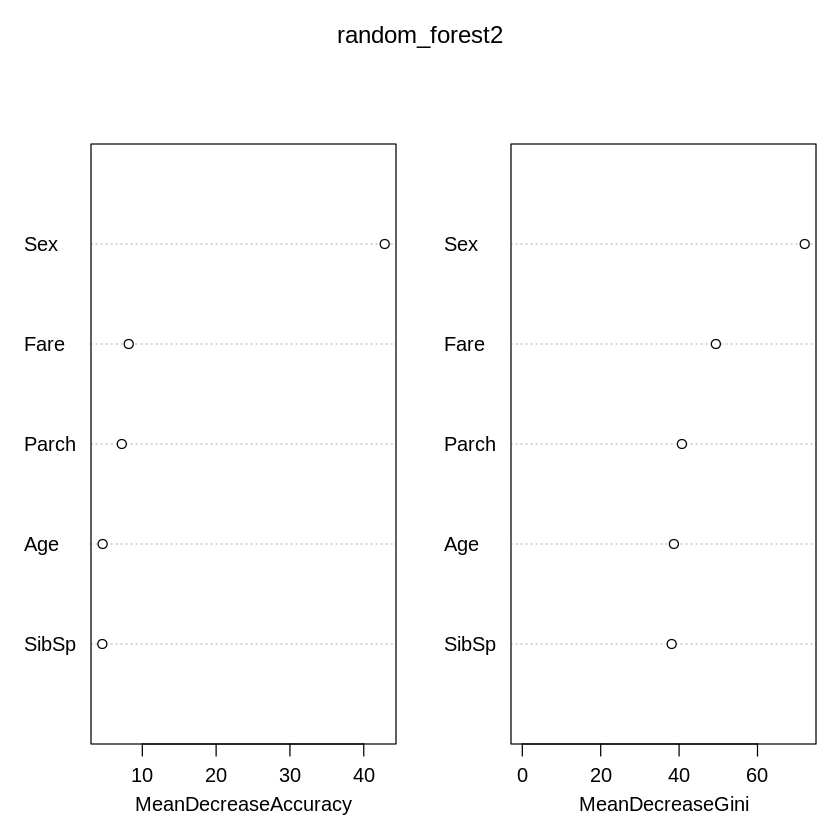

Area under the curve: 0.7199

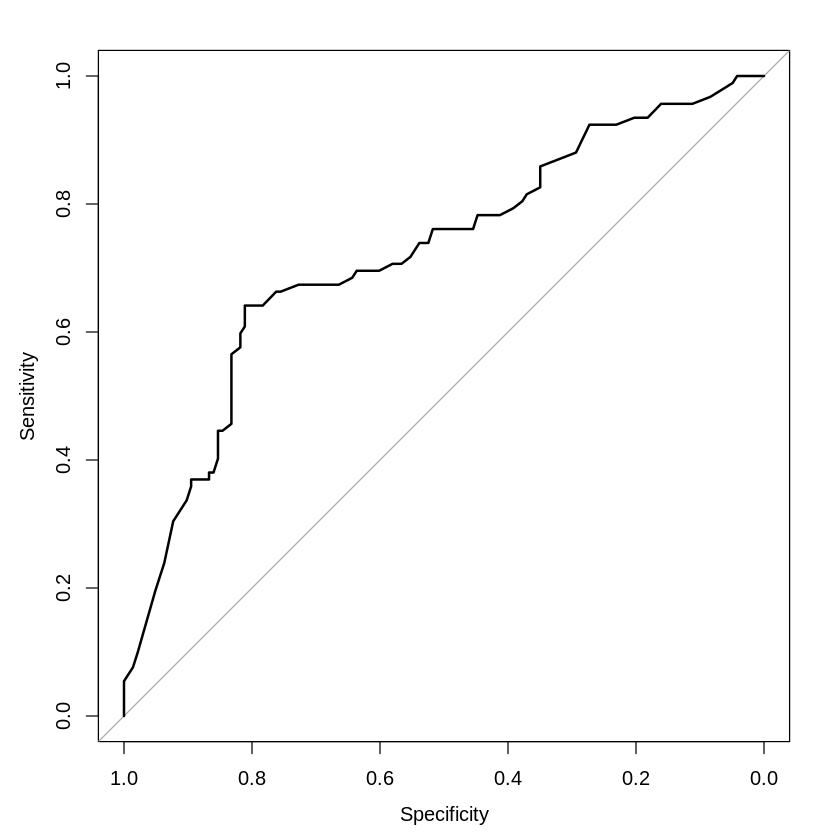

In [0]:
train_ROSE <- ROSE(Survived ~ ., data = train)$data

random_forest2 <- randomForest(Survived ~  Sex + Age + SibSp + Parch + Fare, 
                              data = train_ROSE, ntree=100, importance = TRUE)
importance(random_forest2,type=1)
varImpPlot(random_forest2)

predict <- predict(random_forest2, newdata = test, type = 'prob')

roc1<-roc(test$Survived,predict[,2])
plot(roc1)
auc(roc1)

,MeanDecreaseAccuracy
Sex,36.198443
Age,4.358178
Fare,8.767101


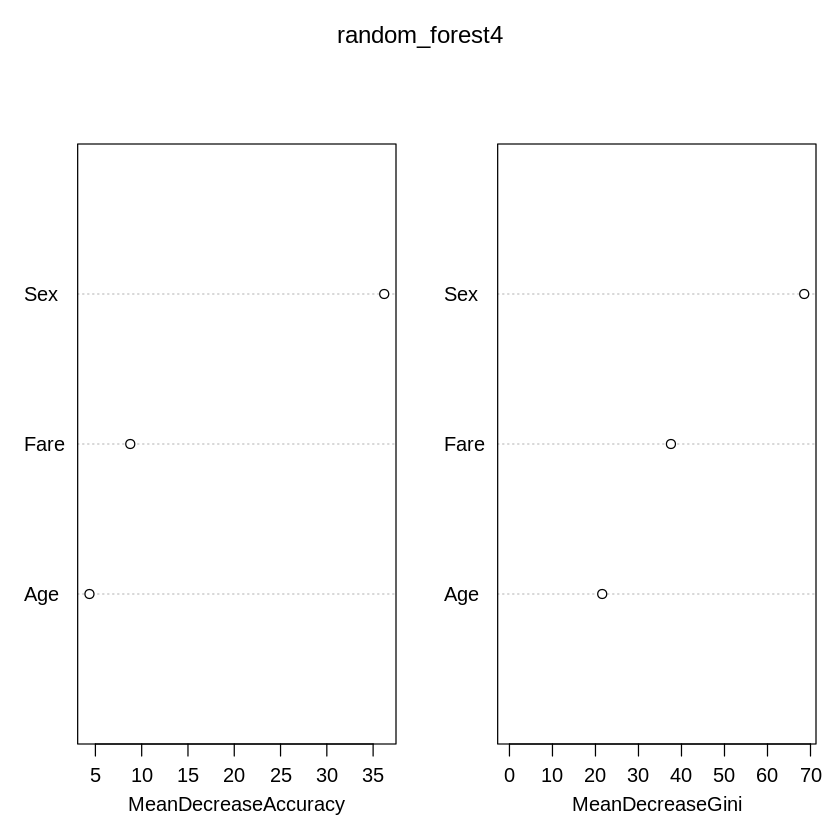

Setting levels: control = 0, case = 1
Setting direction: controls < cases


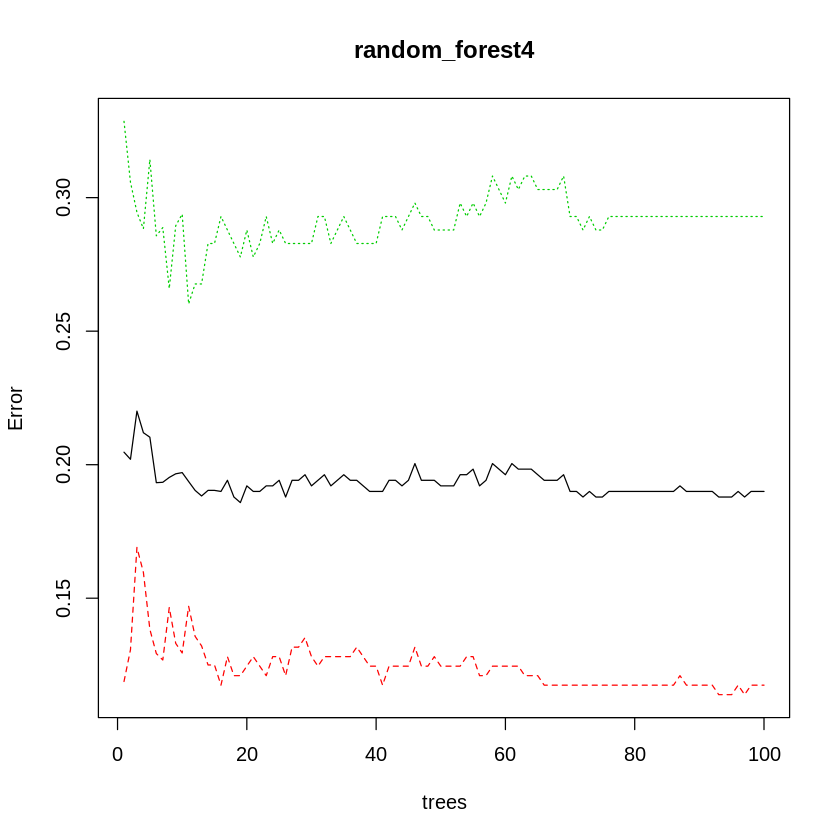

Area under the curve: 0.8031

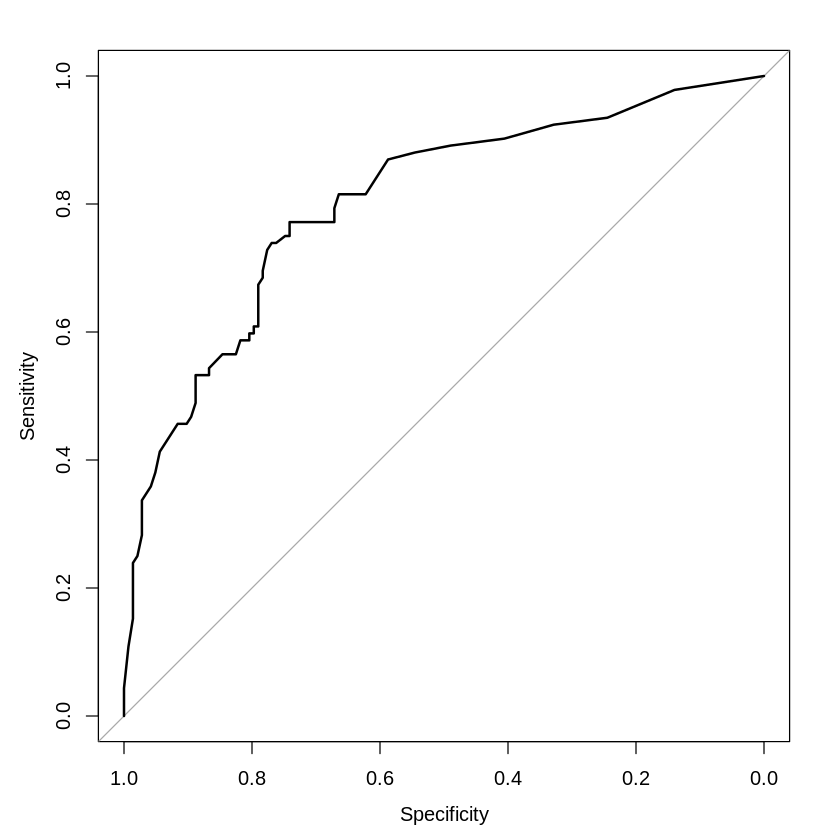

In [0]:
random_forest4 <- randomForest(factor(Survived) ~ Sex + Age + Fare, 
                              data = train, ntree=100, importance = TRUE)
importance(random_forest4,type=1)
varImpPlot(random_forest4)

plot(random_forest4)

rf3_pred <- predict(random_forest4, newdata = test, type = 'prob')



rf3_roc <- roc(test$Survived, rf3_pred[,2])
plot(rf3_roc)
auc(rf3_roc)

# predictions to csv


In [0]:
test.1 <- read.csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")

In [0]:
install.packages("anchors")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘rgenoud’



In [0]:
glimpse(test.1)


Observations: 418
Variables: 11
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 90…
$ Pclass      <int> 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 2, 1, 2, 2, 3, 3, …
$ Name        <fct> "Kelly, Mr. James", "Wilkes, Mrs. James (Ellen Needs)", "…
$ Sex         <fct> male, female, male, male, female, male, female, male, fem…
$ Age         <dbl> 34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26.0, 18.0, 21.…
$ SibSp       <int> 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, …
$ Parch       <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Ticket      <fct> 330911, 363272, 240276, 315154, 3101298, 7538, 330972, 24…
$ Fare        <dbl> 7.8292, 7.0000, 9.6875, 8.6625, 12.2875, 9.2250, 7.6292, …
$ Cabin       <fct> , , , , , , , , , , , , B45, , E31, , , , , , , , , , B57…
$ Embarked    <fct> Q, S, Q, S, S, S, Q, S, C, S, S, S, S, S, S, C, Q, C, S, …


In [0]:
test.1%>%
dplyr::select(everything())%>%
summarize_all(funs(sum(is.na(.))))

test.2 <- test.1 %>%
select(-Age)


test.2%>%
dplyr::select(everything())%>%
  summarize_all(funs(sum(is.na(.))))


test.2$Fare[which(is.na(test.1$Fare))] <- mean(test.1$Fare, na.rm = TRUE)

test.2%>%
dplyr::select(everything())%>%
  summarize_all(funs(sum(is.na(.))))



# change the values for test.1 imputed age and fare


test.1$Fare[which(is.na(test.1$Fare))] <- mean(test.1$Fare, na.rm = TRUE)
test.1$Age[which(is.na(test.1$Age))] <- mean(test.1$Age, na.rm = TRUE)

test.1%>%
dplyr::select(everything())%>%
summarize_all(funs(sum(is.na(.))))

glimpse(test.1)
glimpse(test.2)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,86,0,0,0,1,0,0


PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,1,0,0


PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0


Observations: 418
Variables: 11
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 90…
$ Pclass      <int> 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 2, 1, 2, 2, 3, 3, …
$ Name        <fct> "Kelly, Mr. James", "Wilkes, Mrs. James (Ellen Needs)", "…
$ Sex         <fct> male, female, male, male, female, male, female, male, fem…
$ Age         <dbl> 34.50000, 47.00000, 62.00000, 27.00000, 22.00000, 14.0000…
$ SibSp       <int> 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, …
$ Parch       <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Ticket      <fct> 330911, 363272, 240276, 315154, 3101298, 7538, 330972, 24…
$ Fare        <dbl> 7.8292, 7.0000, 9.6875, 8.6625, 12.2875, 9.2250, 7.6292, …
$ Cabin       <fct> , , , , , , , , , , , , B45, , E31, , , , , , , , , , B57…
$ Embarked    <fct> Q, S, Q, S, S, S, Q, S, C, S, S, S, S, S, S, C, Q, C, S, …
Observations: 418
Variables: 10
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 90

## 2 datasets, imputing age and getting rid of it


## Random forest _ simple models - with and without age

In [0]:
# random forest simple with age imputed 
random_forest4 <- randomForest(factor(Survived) ~ Sex + Age + Fare, 
                              data = train, ntree=100, importance = TRUE)


randomF_simple_1 <- data.frame(PassengerId = test.1$PassengerId)
randomF_simple_1$Survived <- predict(random_forest4,test.1)

write.csv(randomF_simple_1,'/content/sample_data/randomF_simple_with_age.csv', row.names = F)

glimpse(randomF_simple_1)


Observations: 418
Variables: 2
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 90…
$ Survived    <fct> 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, …


In [0]:
# without age # only 2 predictions are different: see intersect function
random_forest4_1 <- randomForest(factor(Survived) ~ Sex + Fare, 
                              data = train, ntree=100, importance = TRUE)


randomF_simple_2 <- data.frame(PassengerId = test.2$PassengerId)
randomF_simple_2$Survived <- predict(random_forest4_1,test.2)

write.csv(randomF_simple_2,'/content/sample_data/randomF_simple_without_age.csv', row.names = F)


glimpse(randomF_simple_2)

#intersect(randomF_simple_2,randomF_simple_1)

Observations: 418
Variables: 2
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 90…
$ Survived    <fct> 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, …


## random forest _ all models with and without age

In [0]:
#randomforest all with age 
random_forest2 <- randomForest(Survived ~  Sex + Age + SibSp + Parch + Fare, 
                              data = train_ROSE, ntree=100, importance = TRUE)

randomF_all <- data.frame(PassengerId = test.1$PassengerId)
randomF_all$Survived <- predict(random_forest2,test.1)

write.csv(randomF_all,'/content/sample_data/randomF_all_with_age.csv', row.names = F)
glimpse(randomF_all)

Observations: 418
Variables: 2
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 90…
$ Survived    <fct> 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, …


In [0]:
# without age 
random_forest2_1 <- randomForest(Survived ~  Sex + SibSp + Parch + Fare, 
                              data = train_ROSE, ntree=100, importance = TRUE)

randomF_all_1 <- data.frame(PassengerId = test.2$PassengerId)
randomF_all_1$Survived <- predict(random_forest2_1,test.2)

write.csv(randomF_all_1,'/content/sample_data/randomF_all_without_age.csv', row.names = F)
glimpse(randomF_all_1)


#intersect(randomF_all_1, randomF_all) 17 predictions are different

Observations: 418
Variables: 2
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 90…
$ Survived    <fct> 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, …


# best _glm with and without age 

In [0]:
#Best_glm with age 
Best_glm_1 <-glm(Survived ~ Pclass*Sex*Age*SibSp*Parch, data = train, family = "binomial")

P <- data.frame(PassengerId = test.1$PassengerI)
P$Survived <- predict(Best_glm_1, test.1, type = 'response')

P<- P %>%
mutate(Survived = ifelse(Survived > 0.5, 1,0)) 

write.csv(P,'/content/sample_data/glm_with_age.csv', row.names = F)
#randomF_simple.to_('/content/sample_data/best_glm.csv', row.names=F)

glimpse(P)



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Observations: 418
Variables: 2
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 90…
$ Survived    <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, …


In [0]:
# best_glm without age 33 predictions are different
Best_glm_1 <-glm(Survived ~ Pclass*Sex*SibSp*Parch, data = train, family = "binomial")

P_1 <- data.frame(PassengerId = test.2$PassengerI)
P_1$Survived <- predict(Best_glm_1, test.2, type = 'response')

P_1 <- P_1 %>%
mutate(Survived = ifelse(Survived > 0.5, 1,0)) 

write.csv(P_1,'/content/sample_data/glm_without_age.csv', row.names = F)
#randomF_simple.to_('/content/sample_data/best_glm.csv', row.names=F)

glimpse(P_1)
#intersect(P_1,P)

Observations: 418
Variables: 2
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 90…
$ Survived    <dbl> 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, …
